<a href="https://colab.research.google.com/github/AndresR10Q/Seminario-Big-Data/blob/main/Lab-4_cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cars price prediction
[Author: Elias Buitrago Bolivar](https://github.com/ebuitrago?tab=repositories)

The objective of this jupyter notebook is to train a machine learning algorithm to predict a car's price, based on known characteristics. The training data was obtained by web scraping, using Selenium and Beautiful Soap from tucarro.com.co; This project has no commercial purposes its for merely academic endeavor.
_Updated: July 8th, 2024_

Refactoring Code: Camilo Cárdenas

## Data understanding

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load data

In [4]:
cols = ['model','price','year','kms','color','fueltype']
data = pd.read_csv('/content/usedCarsCol_cx-5_200624.csv', sep=',', names=cols, header=0, encoding='latin-1')
data.head()

,model,price,year,kms,color,fueltype
0,Mazda CX-30 2.0 Grand Touring At Hibrido,$119.500.000,2024,12.787,Rojo,HÃ­brido
1,Mazda CX-5 2.5 Touring At,$125.900.000,2022,19.500,Rojo,Gasolina
2,Mazda CX-5 2.5 Grand Touring Lx Camioneta,$113.000.000,2018,62.284,Blanco,Gasolina
3,Mazda CX-30 2.0 Grand Touring At,$95.000.000,2022,50.000,Blanco,Gasolina
4,Mazda CX-30 2.5 Grand Touring Lx 4x4,$118.000.000,2022,42.000,Gris,Gasolina


In [5]:
# see data type from dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     432 non-null    object 
 1   price     432 non-null    object 
 2   year      432 non-null    int64  
 3   kms       432 non-null    float64
 4   color     432 non-null    object 
 5   fueltype  432 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 20.4+ KB


### Verify data types

In [9]:
data.dtypes

model        object
price        object
year          int64
kms         float64
color        object
fueltype     object
dtype: object

### Count unique values for each variable

In [10]:
data.nunique()

model       176
price       260
year         16
kms         273
color        10
fueltype      3
dtype: int64

In [11]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Mazda CX-30 2.0 Grand Touring At Hibrido', 'Mazda CX-5 2.5 Touring At', 'Mazda CX-5 2.5 Grand Touring Lx Camioneta', 'Mazda CX-30 2.0 Grand Touring At', 'Mazda CX-30 2.5 Grand Touring Lx 4x4', 'Mazda CX-5 2.0', 'Mazda CX-30 Touring', 'Mazda CX-30 2.0 Touring At', 'Mazda CX-5 2.5 Grand Touring Camioneta', 'Mazda CX-30 2.0 Touring', 'Mazda CX-30 2.5 Grand Touring At', 'Mazda CX-30 2.0 Grand Touring At Hibrido Ligero - Mhev', 'Mazda CX-5 2.5 Grand Touring Lx', 'Mazda CX-5 2.5 Grand Touring Automatico 4x4', 'Mazda CX-5 2.0 Touring Automatico', 'Mazda CX-5 2.5 Grand Touring 4X2 Aut', 'Mazda CX-5 GRAND TOURING CARBON EDITION', 'Mazda cx-50 2.5 Grand Touring 4X2', 'Mazda CX-30 Gran Turing LX 2.5 AUT', 'Mazda CX-5 2.0 Touring', 'Mazda CX-5 2.5 Grand Touring', 'Mazda cx-50 2.5 Grand Touring Lx Awd', 'Mazda CX-30 2.0 Grand Touring Hybrid', 'Mazda CX-9 2.5 Grand Touring Lx', 'Mazda CX-5 GRAND TOURING', 'Mazda cx-50 GRAND TOURING', 'Mazda CX-5 2.5 Grand Touring Station Wagon 4x4', 'Mazda CX-5 GR

### Data transformation

In [12]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(432, 5)

#### Transform $price$ to numerical

In [13]:
datacc['price'] = datacc['price'].str.replace(r'[$.]', '', regex=True).astype(int)

##### Transform $kms$ to numerical

In [14]:
# remove regex string, the datatype kms is float not string.
#datacc['kms'] = datacc['kms'].str.replace(r'[.]', '',regex=True).astype(int)
datacc['kms'] = (datacc['kms']*1000).astype(int)
datacc.info()
datacc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     432 non-null    int64 
 1   year      432 non-null    int64 
 2   kms       432 non-null    int64 
 3   color     432 non-null    object
 4   fueltype  432 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.0+ KB


,price,year,kms,color,fueltype
0,119500000,2024,12787,Rojo,HÃ­brido
1,125900000,2022,19500,Rojo,Gasolina
2,113000000,2018,62284,Blanco,Gasolina
3,95000000,2022,50000,Blanco,Gasolina
4,118000000,2022,42000,Gris,Gasolina


In [15]:
datacc.sort_values('kms', ascending=False)

,price,year,kms,color,fueltype
424,172500000,2024,800000,Color not found,Gasolina
134,148700000,2024,330000,Azul,Gasolina
389,38000000,2008,176000,Blanco,Gasolina
112,66900000,2014,170000,Gris,Gasolina
56,53000000,2011,155326,Gris,Gasolina
...,...,...,...,...,...
240,111700000,2025,0,Blanco,Gasolina
342,175850000,2025,0,Gris,Gasolina
241,126000000,2025,0,Rojo,HÃ­brido
242,130450000,2025,0,Rojo,HÃ­brido


In [16]:
# remove letter 'Publicado'
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [17]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

##### Transform categorical variables to dummies: $year$ and $fuel type$

In [18]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [19]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,119500000,2024,12787,8,2
1,125900000,2022,19500,8,0
2,113000000,2018,62284,1,0
3,95000000,2022,50000,1,0
4,118000000,2022,42000,4,0


## Data Exploration

In [20]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,4.320000e+02,432.000000,432.000000
mean,1.217330e+08,2021.192130,39155.268519
std,5.800257e+07,3.151641,51996.474754
min,3.800000e+07,2008.000000,0.000000
25%,9.690000e+07,2020.000000,9200.000000
50%,1.139500e+08,2022.000000,30250.000000
75%,1.395725e+08,2024.000000,53196.500000
max,1.049000e+09,2025.000000,800000.000000


In [21]:
#Find with value year = 0
print(datacc[datacc['year'] == 0])


Empty DataFrame
Columns: [price, year, kms, color, fueltype]
Index: []


In [22]:
#Delete rows in new dataset with new values
datacc = datacc[datacc['year'] != 0]
#Verify unique values
print(datacc['year'].unique().tolist())

[2024, 2022, 2018, 2015, 2021, 2023, 2020, 2016, 2017, 2019, 2008, 2011, 2014, 2025, 2013, 2012]


#### Histograms

<ipython-input-23-8d5fe7c9e008>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation=45)
<ipython-input-23-8d5fe7c9e008>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation=45)
<ipython-input-23-8d5fe7c9e008>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticks(), rotation=45)


[Text(-200000.0, 0, '-200000.0'),
 Text(0.0, 0, '0.0'),
 Text(200000.0, 0, '200000.0'),
 Text(400000.0, 0, '400000.0'),
 Text(600000.0, 0, '600000.0'),
 Text(800000.0, 0, '800000.0'),
 Text(1000000.0, 0, '1000000.0')]

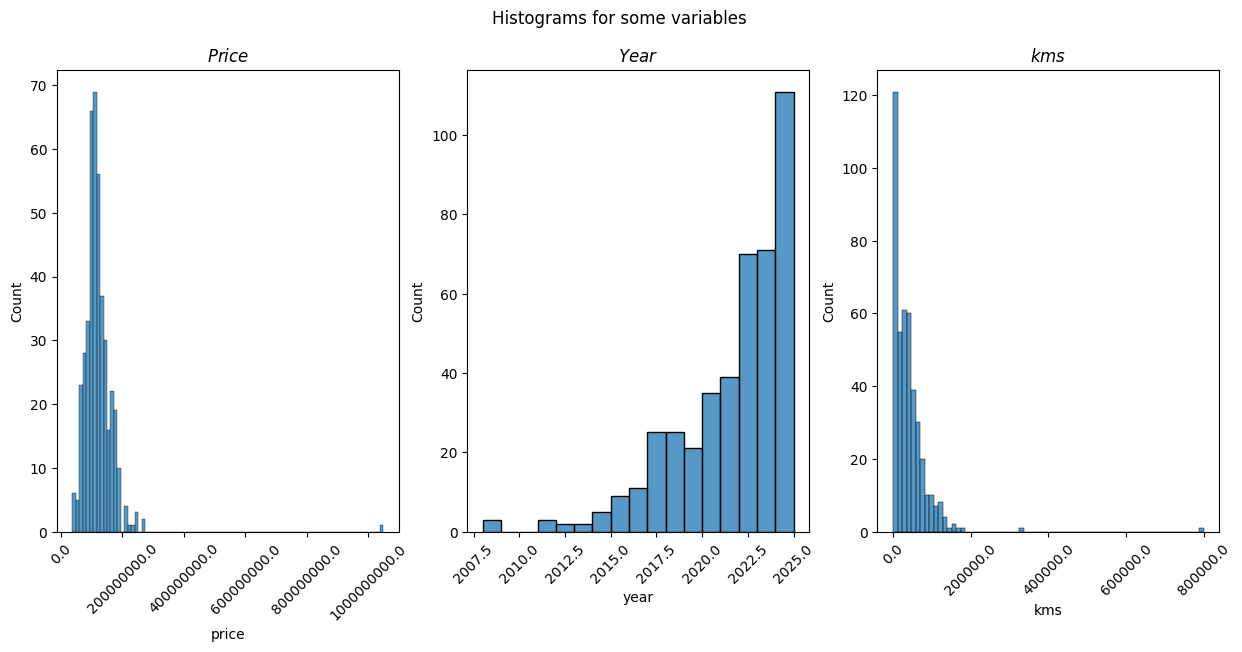

In [23]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
ax1.set_xticklabels(ax1.get_xticks(), rotation=45)

sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
ax2.set_xticklabels(ax2.get_xticks(), rotation=45)

sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')
ax3.set_xticklabels(ax3.get_xticks(), rotation=45)

#### Boxplots

<Axes: >

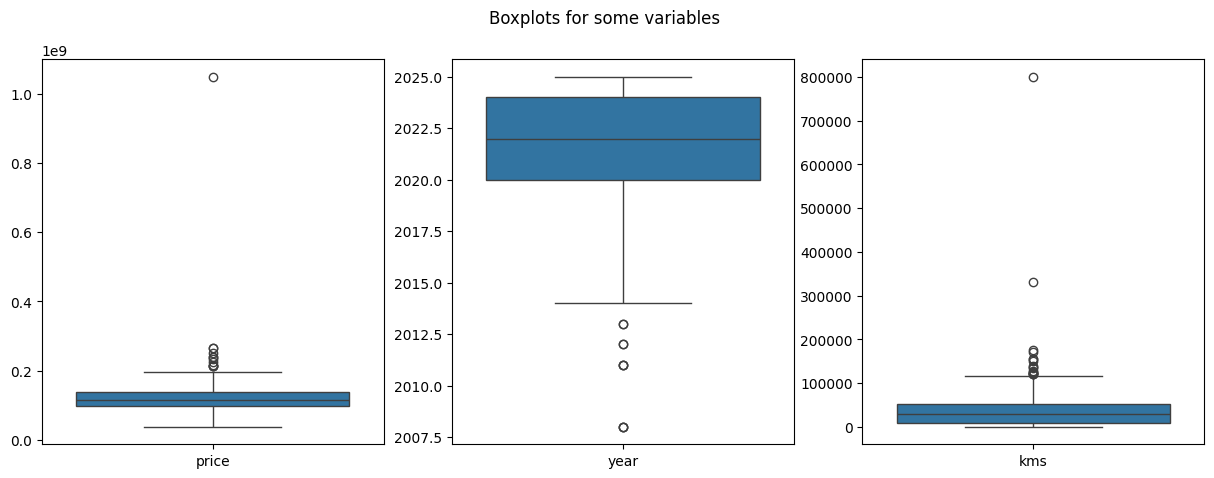

In [24]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

<Axes: >

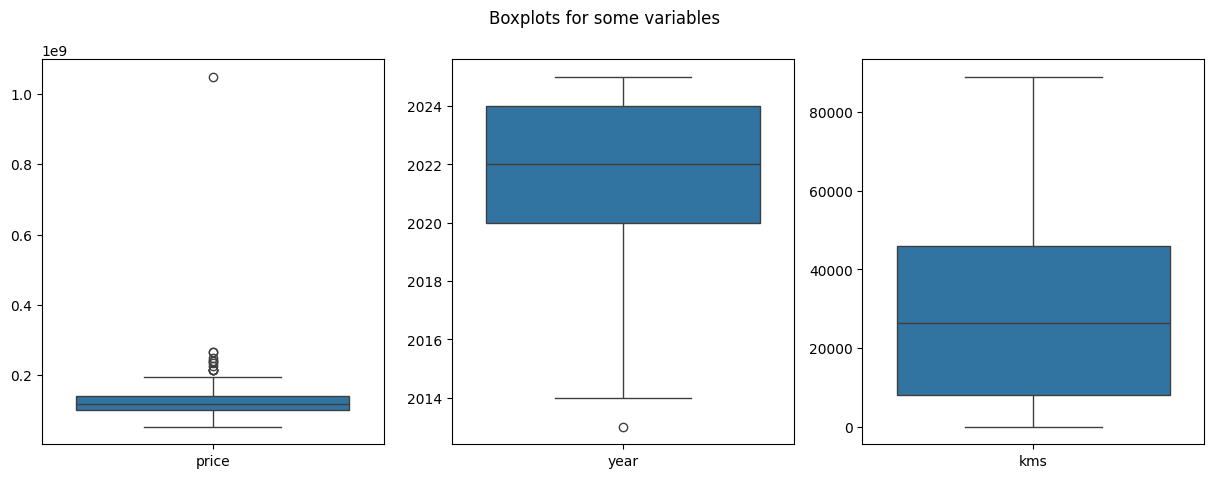

In [25]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>1)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

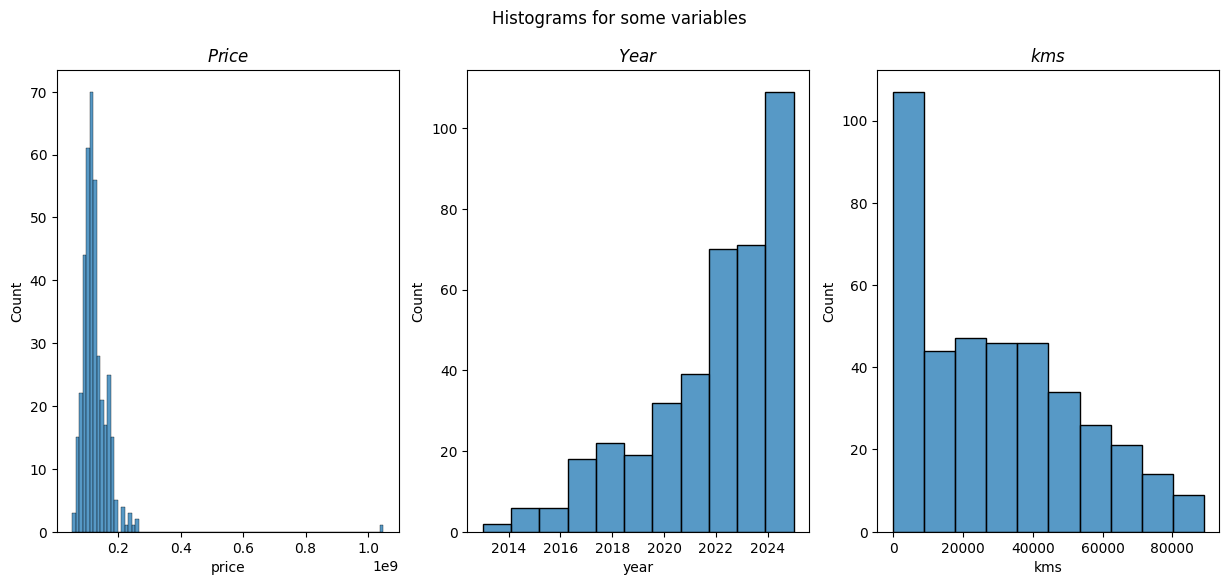

In [26]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

### EDA (Exploratory Data Analysis)

#### Correlations

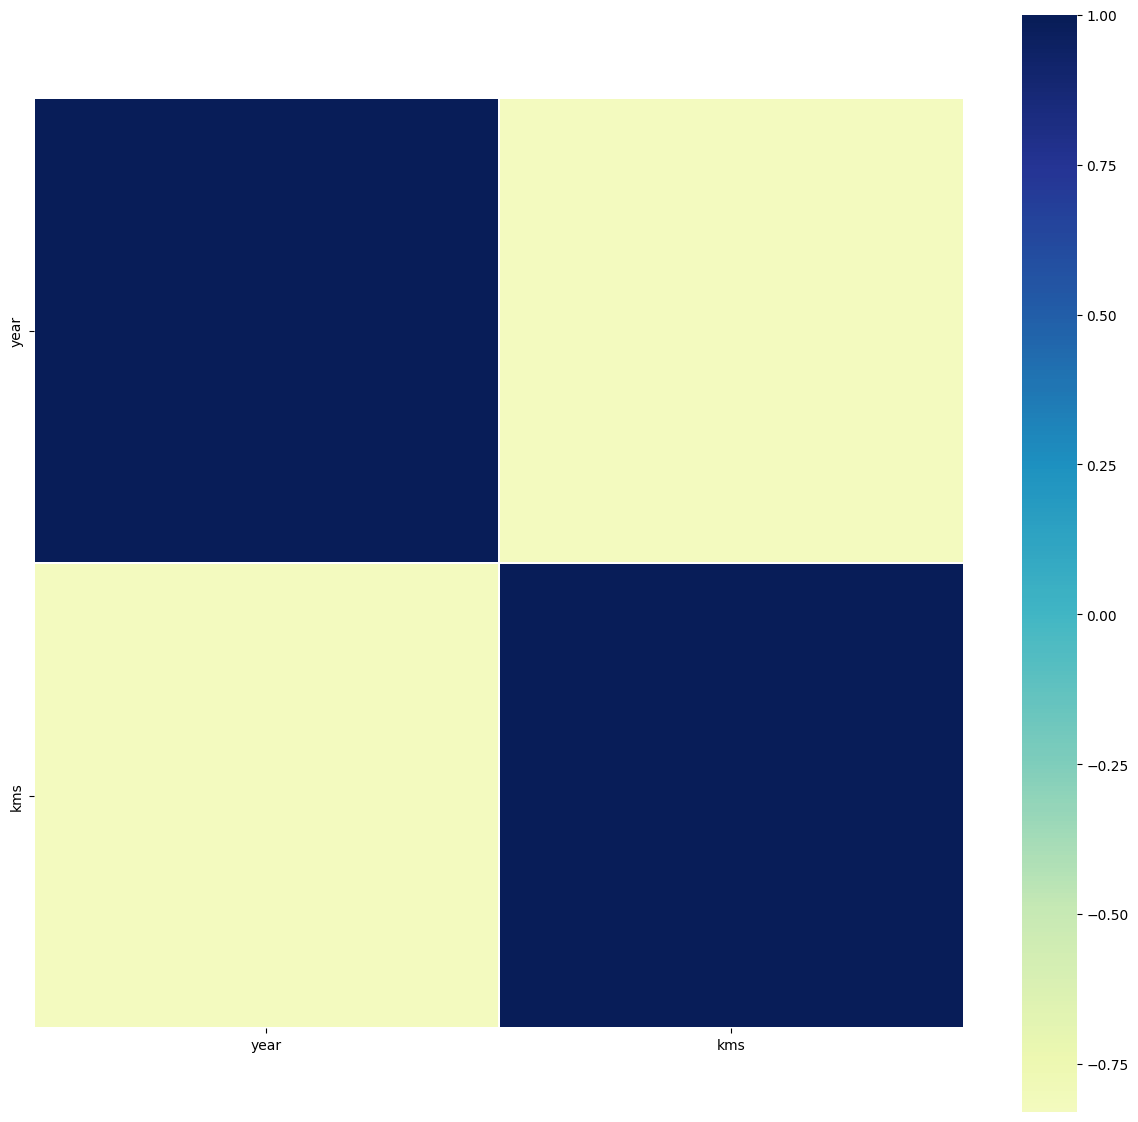

In [27]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(datacc[['year', 'kms']])

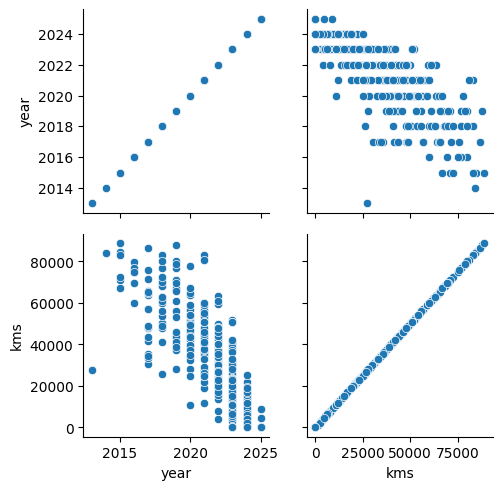

In [28]:
g = sns.PairGrid(datacc[['year', 'kms']])
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

### Data partitioning


In [30]:
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(394, 4)
(394,)


In [31]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(394, 4)

In [32]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20,
                                         random_state=42)

### Multivariate lineal regression

In [33]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [34]:
# accuracy check
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 26180161.90
MAE: 20568340.53
R2: 0.53


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [35]:
!pip install lightgbm

In [36]:
import lightgbm as lgb

In [37]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [38]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 24698780.37
MAE: 17851046.57
R2: 0.58


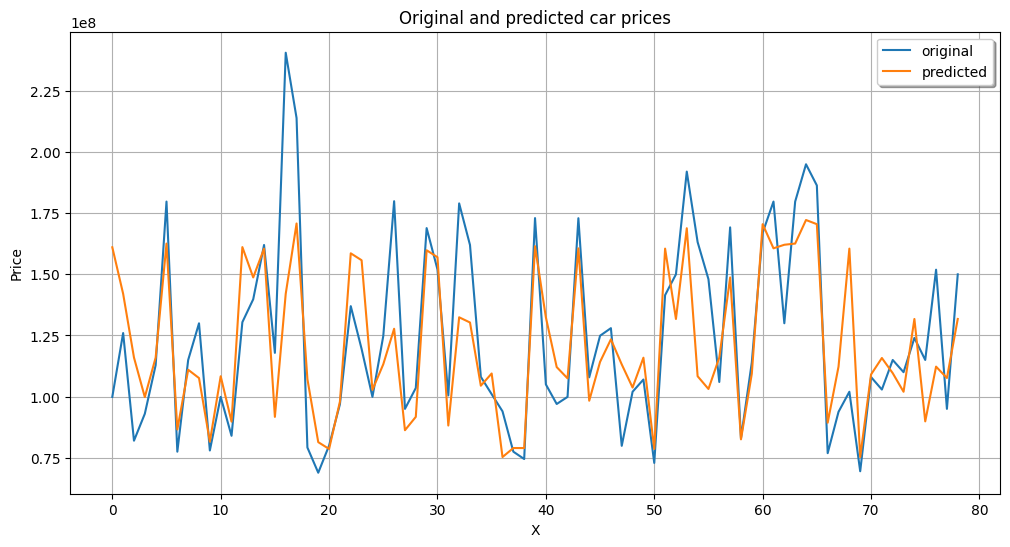

In [39]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

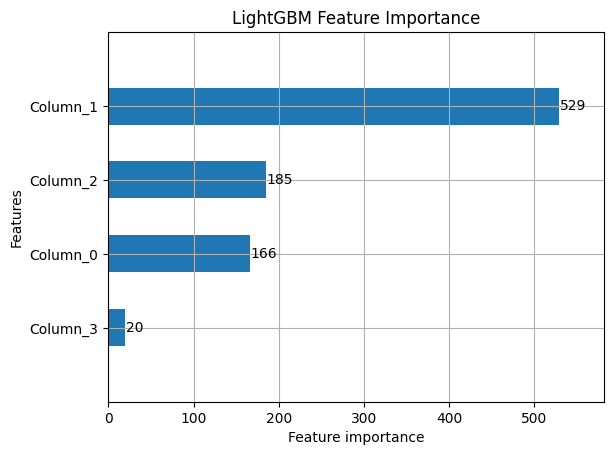

In [40]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")


<Axes: >

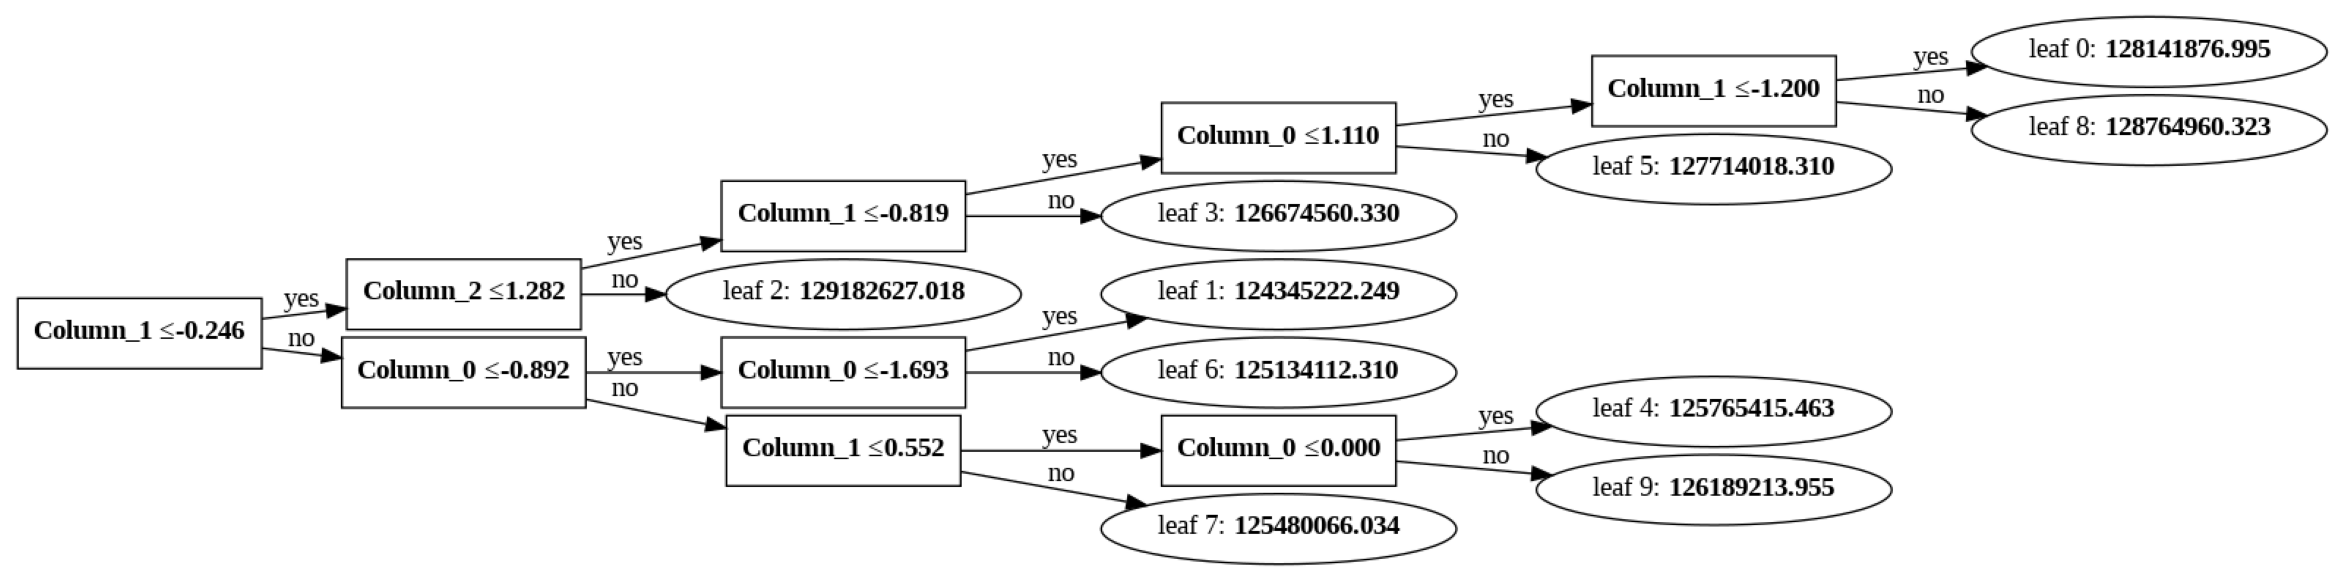

In [41]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [44]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 30463814.37
MAE: 19764369.91
R2: 0.36


**Save the model**

In [45]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [46]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [47]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [48]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.14


In [50]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.10


In [51]:
# Pred
y_pred4 = model4.predict(X_test)

In [52]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 32460390.52
MAE: 21949318.78
R2: 0.27


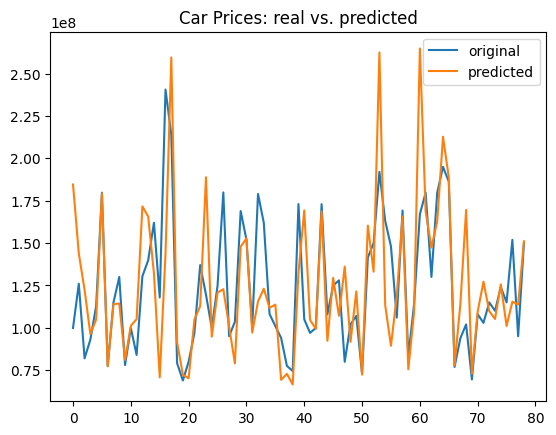

In [53]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()